# 使用rasterio库
rasterio是基于GDAL库二次封装的用于空间栅格数据处理的Python库。  
rasterio支持多种栅格数据格式，如GeoTIFF、ENVI和HDF5，为处理和分析栅格数据提供了强大的工具。

## 一、计算mndwi

In [1]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [2]:
path_img = "E://YNU//5//OpenSourceGIS//Act_6//OnClass//chenggong_utm48.tif"

In [3]:
rsimg = rio.open(path_img)
rsimg.crs
rsimg.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 2875,
 'height': 3379,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'),
 'transform': Affine(10.421454790528236, 0.0, 268167.02525260474,
        0.0, -9.543567381150961, 2765453.1872716597)}

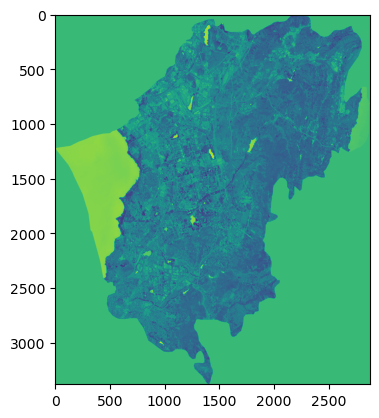

In [4]:
rsimg_arr = rsimg.read()
rsimg_arr = np.float32(rsimg_arr)
## 计算MNDWI指数
mndwi = (rsimg_arr[1] - rsimg_arr[3]) / (rsimg_arr[1] + rsimg_arr[3] + 0.00001)
plt.imshow(mndwi)

In [5]:
## 数据写出
path_out = "E://YNU//5//OpenSourceGIS//Act_6//OnClass//chenggong_utm48_mndwi.tif"
with rio.open(path_out, 'w', 
         driver=rsimg.driver, 
         width=rsimg.width, 
         height=rsimg.height,  
         count=1, 
         dtype=np.float32, 
         crs=rsimg.crs, 
         transform=rsimg.transform
         ) as dst: 
     dst.write(mndwi, 1)

## 二、矢量转栅格

In [6]:
path_vec = "E://YNU//5//OpenSourceGIS//Act_6//OnClass//chenggong_water.gpkg"
path_img = "E://YNU//5//OpenSourceGIS//Act_6//OnClass//chenggong_utm48.tif"

In [7]:
rsimg_rio = rio.open(path_img)
vec_gpd = gpd.read_file(path_vec)

In [8]:
vec_gpd.plot

In [9]:
from rasterio import features
vecToraster = features.rasterize(shapes = vec_gpd.geometry, 
                                 out_shape = rsimg_arr[0].shape, 
                                 default_value = 1, 
                                 fill = 0, 
                                 transform = rsimg_rio.transform, 
                                 dtype = None
                                 )

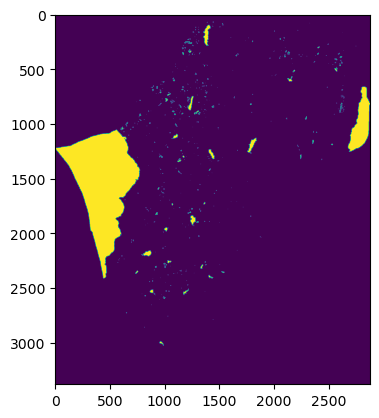

In [10]:
plt.imshow(vecToraster)

## 三、栅格转矢量

In [11]:
path_raster = "E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_mndwi.tif"
raster_rio = rio.open(path_raster)
raster_arr = raster_rio.read(1)
raster_arr.shape
raster_rio.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 2875,
 'height': 3379,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'),
 'transform': Affine(10.421454790528236, 0.0, 268167.02525260474,
        0.0, -9.543567381150961, 2765453.1872716597)}

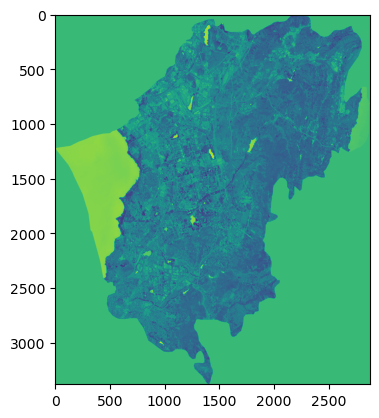

In [12]:
plt.imshow(raster_arr)

In [13]:
from shapely.geometry import shape
values, geos = [], []
for geo, value in features.shapes(np.float32(raster_arr), transform = raster_rio.transform):
    # if value == 1:
        values.append(value)
        geos.append(geo)

geos = [shape(geo) for geo in geos]
dict = {'DN': values, 'geometry': geos}
region_gpd = gpd.GeoDataFrame(dict, crs = 'EPSG:32648')

<Axes: >

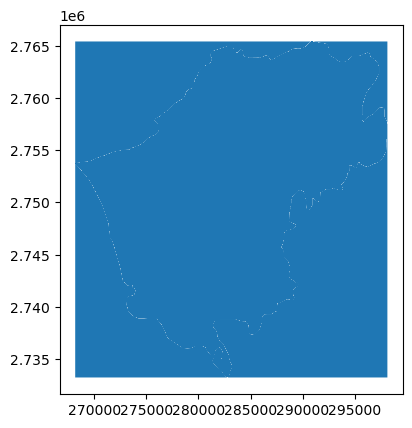

In [14]:
region_gpd.plot()

## 四、裁剪

In [ ]:
path_rsimg = "E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48.tif"
path_vector = "E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48.gpkg"


In [ ]:
import rasterio as rio # 读入栅格数据的库
import geopandas as gpd # 读入矢量数据的库
rsimg_rio = rio.open(path_rsimg)
print(rsimg_rio.meta)    # 打印栅格数据的属性
vector_gpd = gpd.read_file(path_vector)
vector_gpd_utm = vector_gpd.to_crs(32648)
vector_gpd_utm

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 2875, 'height': 3379, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32648"]]'), 'transform': Affine(10.421454790528236, 0.0, 268167.02525260474,
       0.0, -9.543567381150961, 2765453.1872716597)}


,geometry
0,"POLYGON ((282405.506 2747958.287, 283184.648 2..."


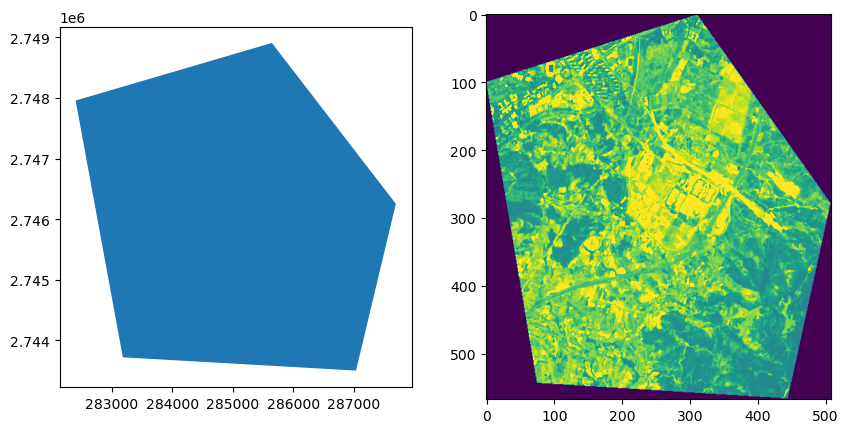

In [ ]:
from rasterio import mask
import matplotlib.pyplot as plt
rsimg_sub, rsimg_sub_trans = mask.mask(rsimg_rio, vector_gpd_utm.geometry, crop=True, nodata=0)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
vector_gpd_utm.plot(ax = ax[0])
ax[1].imshow(rsimg_sub[0], vmin = 0, vmax = 3000)

In [ ]:
path_subset = 'E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_subset_2.tif'
out_meta = rsimg_rio.meta
out_meta.update({
    'driver': 'GTiff',
    'height': rsimg_sub.shape[1],
    'width': rsimg_sub.shape[2],
    'transform': rsimg_sub_trans})
with rio.open(path_subset, 'w', **out_meta) as dset:
    dset.write(rsimg_sub)

## 五、拼接

In [ ]:
path_subset_1 = 'E:/YNU//5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_subset_1.tif'
path_subset_2 = 'E:/YNU//5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_subset_2.tif'

In [ ]:
subs1_rio = rio.open(path_subset_1)
subs2_rio = rio.open(path_subset_2)

In [ ]:
from rasterio.merge import merge
mosaic, out_trans = merge([subs1_rio, subs2_rio])

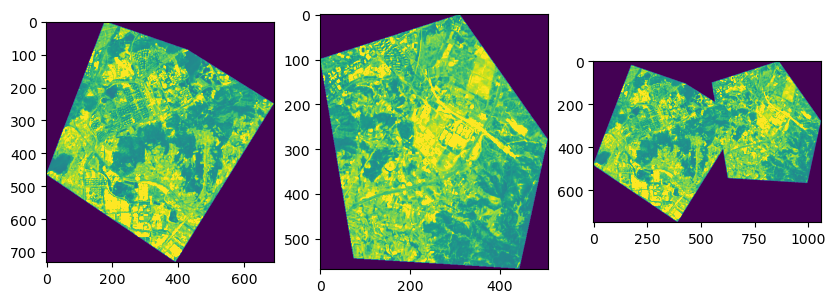

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(subs1_rio.read(1), vmin=0, vmax=3000)
ax[1].imshow(subs2_rio.read(1), vmin=0, vmax=3000)
ax[2].imshow(mosaic[0], vmin=0, vmax=3000)

## 六、查看世界投影

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat

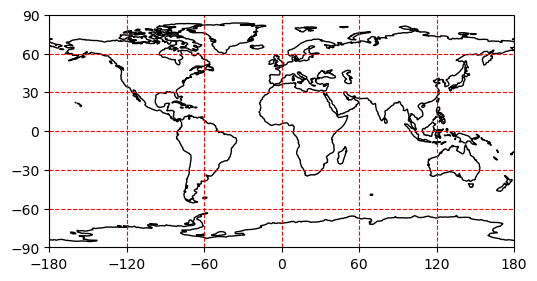

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6, 6))
ax_geo = fig.add_subplot(1, 1, 1, projection=proj)
x_ticks = [-180, -120, -60, 0, 60, 120, 180]
y_ticks = [-90, -60, -30, 0, 30, 60, 90]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)
ax_geo.gridlines(linestyle = '--', color = 'red')
ax_geo.add_feature(cfeat.COASTLINE) # 画海岸线

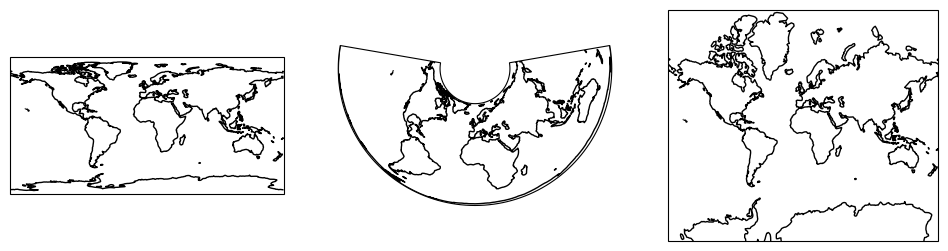

In [18]:
proj1 = ccrs.PlateCarree() ## 等距圆柱投影
proj2 = ccrs.AlbersEqualArea() ## 阿尔伯特等距圈
proj3 = ccrs.Mercator() ## 墨卡托投影
fig = plt.figure(figsize=(12,3))
ax_geo1 = fig.add_subplot(1,3,1, projection=proj1)
ax_geo1.add_feature(cfeat.COASTLINE)
ax_geo2 = fig.add_subplot(1,3,2, projection=proj2)
ax_geo2.add_feature(cfeat.COASTLINE)
ax_geo3 = fig.add_subplot(1,3,3, projection=proj3)
ax_geo3.add_feature(cfeat.COASTLINE)

## 可视化矢量数据

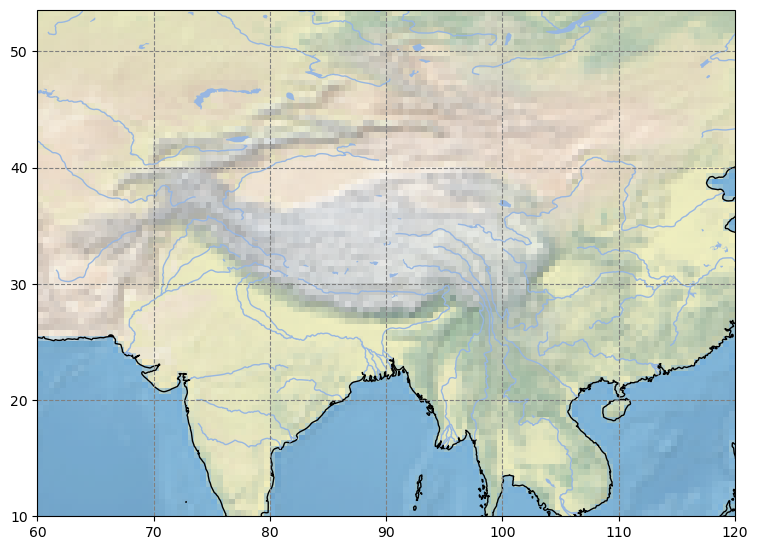

In [38]:
proj = ccrs.PlateCarree()  # 定义投影坐标系
fig = plt.figure(figsize=(9, 9))  # 定义画布大小
ax_geo = fig.add_subplot(1, 1, 1, projection=proj)  # 定义地理坐标系
ax_geo.add_feature(cfeat.COASTLINE)  # 绘制海岸线
ax_geo.add_feature(cfeat.LAND)  # 绘制陆地
ax_geo.add_feature(cfeat.OCEAN)  # 绘制海洋
ax_geo.add_feature(cfeat.RIVERS)     # 绘制河流
ax_geo.add_feature(cfeat.LAKES)     # 绘制湖泊
ax_geo.stock_img()
ax_geo.set_extent([60,120,10,50])
x_ticks = [60, 70, 80, 90, 100, 110, 120]
y_ticks = [10, 20, 30, 40, 50]
ax_geo.set_xticks(x_ticks)
ax_geo.set_yticks(y_ticks)
ax_geo.gridlines(linestyle = '--', color = 'gray')

In [35]:
import geopandas as gpd
path_kunming = "E:/YNU/5/OpenSourceGIS/Act_4/OnClass/kunming_wgs84.gpkg"
kunming_gpd = gpd.read_file(path_kunming)
print(kunming_gpd.crs)
kunming_gpd.head()

EPSG:4326


,dt_adcode,dt_name,ct_adcode,ct_name,pr_adcode,pr_name,cn_adcode,cn_name,geometry
0,530102,五华区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71331 25.13652, 102.71547 ..."
1,530103,盘龙区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71668 25.04473, 102.71663 ..."
2,530111,官渡区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.71717 25.03341, 102.71792 ..."
3,530112,西山区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.50726 24.86019, 102.50689 ..."
4,530113,东川区,530100,昆明市,530000,云南省,100000,中华人民共和国,"MULTIPOLYGON (((102.8034 26.30291, 102.80537 2..."


<Axes: >

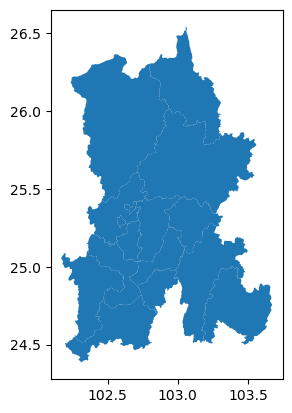

In [40]:
kunming_gpd.plot()

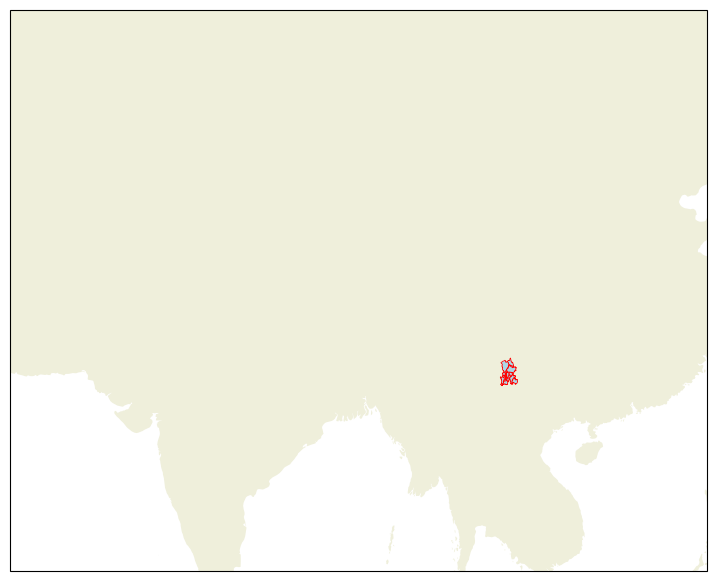

In [ ]:
proj = ccrs.PlateCarree()  # 定义投影坐标系
fig = plt.figure(figsize = (9, 9))  # 定义画布大小
ax_geo = fig.add_subplot(1, 1, 1, projection = proj)  # 定义地理坐标系
ax_geo.add_feature(cfeat.LAND)
kunming_gpd.plot(ax = ax_geo, facecolor = 'lightblue', edgecolor = 'red', linewidth = 0.5)
ax_geo.set_extent([104, 105, 24, 27])  # 设置地理坐标系范围
ax_geo.set_extent([60,120,10,50])
# x_ticks = [101, 102, 103, 104, 105]
# y_ticks = [24, 25, 26, 27]
# ax_geo.set_xticks(x_ticks)
# ax_geo.set_yticks(y_ticks)
# ax_geo.gridlines(linestyle = '--', color = 'gray')

## 可视化栅格数据

In [66]:
import rasterio as rio
import numpy as np
path_rsimg = "E:/YNU/5/OpenSourceGIS/Act_5/OnClass/chenggong_wgs84.tif"
rsimg_rio = rio.open(path_rsimg)
array_rsimg = rsimg_rio.read()
# array_rsimg = array_rsimg.transpose(1,2,0)
array_rsimg_ = np.clip(array_rsimg, 0, 3000)/3000
array_rsimg_ = np.where(array_rsimg_==0, 1, array_rsimg_)
extent_rsimg = [rsimg_rio.bounds[0],
                rsimg_rio.bounds[2],
                rsimg_rio.bounds[1],
                rsimg_rio.bounds[3]]
extent_rsimg

[102.705117, 103.001118, 24.697923, 24.990151999999995]

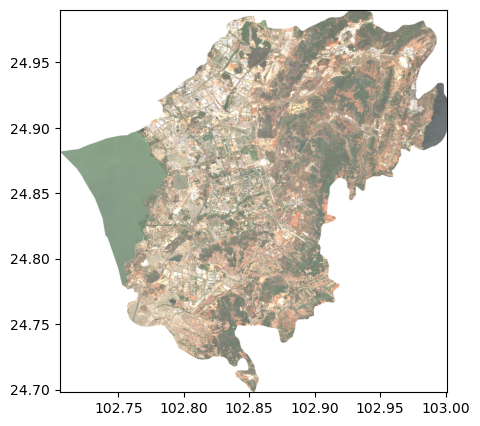

In [67]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
array_rsimg_ = array_rsimg_.transpose(1,2,0)
ax.imshow(array_rsimg_[:, :, 0:3], extent = extent_rsimg)

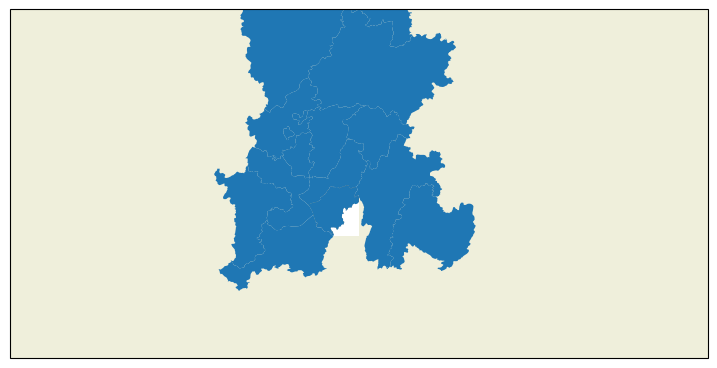

In [68]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(9,9))
ax_geo = fig.add_subplot(1,1,1, projection=proj)
ax_geo.add_feature(cfeat.LAND)
ax_geo.set_extent([101,105,24,26])
kunming_gpd.plot(ax = ax_geo)
ax_geo.imshow(array_rsimg_[:,:,0:3], extent = extent_rsimg)

In [73]:
path_reg1 = 'E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_subset_1.tif'
path_reg2 = 'E:/YNU/5/OpenSourceGIS/Act_6/OnClass/chenggong_utm48_subset_2.tif'
rsimg1_rio = rio.open(path_reg1)
rsimg2_rio = rio.open(path_reg2)

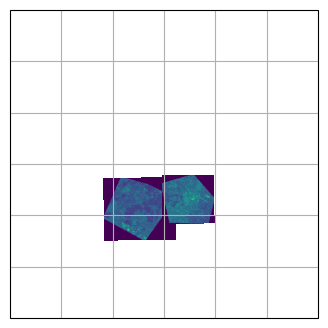

In [75]:
proj =ccrs.PlateCarree()
proj_utm = ccrs.UTM(zone=48, southern_hemisphere=False)
fig = plt.figure(figsize=(4,4))
ax_geo = fig.add_subplot(1,1,1, projection=proj)
ax_geo.set_extent([102.7, 103, 24.7, 25])

extent_rsimg1 = [rsimg1_rio.bounds[0],
                 rsimg1_rio.bounds[2],
                 rsimg1_rio.bounds[1],
                 rsimg1_rio.bounds[3]]
extent_rsimg2 = [rsimg2_rio.bounds[0],
                 rsimg2_rio.bounds[2],
                 rsimg2_rio.bounds[1],
                 rsimg2_rio.bounds[3]]

ax_geo.imshow(rsimg1_rio.read(1), extent=extent_rsimg1, transform = proj_utm)
ax_geo.imshow(rsimg2_rio.read(1), extent=extent_rsimg2, transform = proj_utm)
ax_geo.gridlines()